DATA CREATION

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)
keywords = ['good', 'bad', 'fast', 'slow', 'cheap', 'expensive', 'useful', 'useless', 'durable', 'broken']

reviews = []
for _ in range(1000):
    num_words = np.random.randint(5, 20)
    review = ' '.join(np.random.choice(keywords, num_words))
    reviews.append(review)

df = pd.DataFrame({'Review_ID': range(1, 1001), 'Text': reviews})
df.to_csv("product_reviews.csv", index=False)


## Tasks:
1. Tokenize and clean the text (remove punctuation, lowercase).

2. Generate a frequency distribution of all keywords.

3. Visualize it using:

- Bar chart for top words

- Optional: Word cloud

4. Identify:

- Top 3 positive words and their frequency

- Top 3 negative words and their frequency



In [2]:
df.head()

,Review_ID,Text
0,1,slow useless cheap useful broken fast useful u...
1,2,fast expensive cheap bad useless expensive bad...
2,3,broken fast useful slow durable
3,4,cheap fast useful cheap durable useful bad
4,5,durable bad broken durable broken cheap bad slow


In [3]:
df['Text'] = df['Text'].str.lower()  # Convert to lowercase

In [4]:
import string
def contain_punctuation(text):
    return any(char in string.punctuation for char in text)

df['Contains_Punctuation'] = df['Text'].apply(contain_punctuation)
df['Contains_Punctuation'].unique()

array([False])

In [5]:
df['Token'] = df['Text'].str.split()  # Tokenize the text
df.head()

,Review_ID,Text,Contains_Punctuation,Token
0,1,slow useless cheap useful broken fast useful u...,False,"[slow, useless, cheap, useful, broken, fast, u..."
1,2,fast expensive cheap bad useless expensive bad...,False,"[fast, expensive, cheap, bad, useless, expensi..."
2,3,broken fast useful slow durable,False,"[broken, fast, useful, slow, durable]"
3,4,cheap fast useful cheap durable useful bad,False,"[cheap, fast, useful, cheap, durable, useful, ..."
4,5,durable bad broken durable broken cheap bad slow,False,"[durable, bad, broken, durable, broken, cheap,..."


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

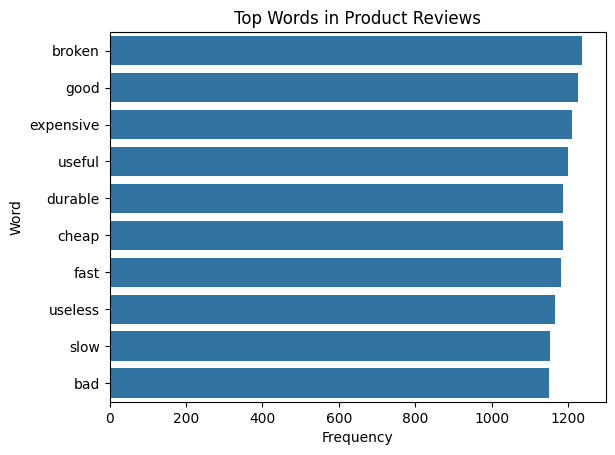

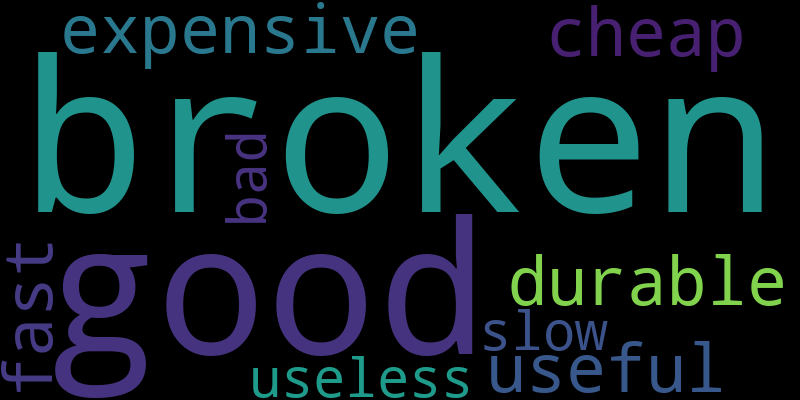

In [7]:
from collections import Counter
from wordcloud import WordCloud

words = ' '.join(df['Text']).lower().split()
word_freq = Counter(words)

# Bar chart
freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
sns.barplot(data=freq_df.head(10), x='Frequency', y='Word')
plt.title("Top Words in Product Reviews")
plt.show()

# WordCloud (optional)
WordCloud(width=800, height=400).generate_from_frequencies(word_freq).to_image()


In [8]:
df.head()

,Review_ID,Text,Contains_Punctuation,Token
0,1,slow useless cheap useful broken fast useful u...,False,"[slow, useless, cheap, useful, broken, fast, u..."
1,2,fast expensive cheap bad useless expensive bad...,False,"[fast, expensive, cheap, bad, useless, expensi..."
2,3,broken fast useful slow durable,False,"[broken, fast, useful, slow, durable]"
3,4,cheap fast useful cheap durable useful bad,False,"[cheap, fast, useful, cheap, durable, useful, ..."
4,5,durable bad broken durable broken cheap bad slow,False,"[durable, bad, broken, durable, broken, cheap,..."


In [9]:
def freq_word(word):
    return sum(word in review for review in df['Token'])
    
freq_word('good'), freq_word('useful'), freq_word('durable')

(689, 698, 697)

In [10]:
def total_occurrence(word):
    return sum(review.count(word) for review in df['Token'])

total_occurrence('good'), total_occurrence('useful'), total_occurrence('durable')

(1227, 1199, 1187)

In [11]:
# Top 3 positive words and their frequency
positive_words = ['good', 'useful', 'durable']
# Top 3 negative words and their frequency
negative_words = ['expensive', 'useless', 'broken']

pos_word_freq=pd.DataFrame({
    'positive_word' : positive_words,
    'positive_frequency': [freq_word(word) for word in positive_words]
}).set_index('positive_word')

neg_word_freq=pd.DataFrame({
    'negative_word' : negative_words,
    'negative_frequncy' : [freq_word(word) for word in negative_words]
}).set_index('negative_word')



In [12]:
pos_word_freq.head()

,positive_frequency
positive_word,
good,689
useful,698
durable,697


In [13]:
neg_word_freq.head()

,negative_frequncy
negative_word,
expensive,693
useless,670
broken,689


In [ ]:
# Step 1: Get all words from token lists
all_words = [word for review in df['Token'] for word in review]

# Step 2: Get unique words to avoid repetition
unique_words = set(all_words)

# Step 3: Apply freq_word() to each unique word
word_freq = pd.DataFrame({
    'word': list(unique_words),
    'frequency': [freq_word(word) for word in unique_words]
}).sort_values(by='frequency', ascending=False)


In [26]:
word_freq

,word,frequency
6,useful,698
4,durable,697
5,expensive,693
8,cheap,690
2,broken,689
3,good,689
7,bad,678
0,useless,670
9,fast,670
1,slow,661
